In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns',False)
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv('data.csv')
df = df.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1)
df = df.drop_duplicates(subset = ['deskripsi'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23965 entries, 0 to 24693
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    23965 non-null  object 
 1   kamar          23965 non-null  object 
 2   lb             23250 non-null  float64
 3   lt             19514 non-null  float64
 4   tipe_property  23965 non-null  object 
 5   price          23954 non-null  float64
 6   sertifikat     23965 non-null  int64  
 7   deskripsi      23964 non-null  object 
 8   lokasi         23596 non-null  object 
 9   ada_garasi     23965 non-null  float64
 10  pool           23965 non-null  int64  
 11  taman          23965 non-null  int64  
 12  electricity    23456 non-null  float64
 13  floors_total   23784 non-null  float64
 14  gym            23965 non-null  int64  
dtypes: float64(6), int64(4), object(5)
memory usage: 2.9+ MB


Benerin tipe data

In [4]:
df = df.dropna(subset = ['price','lokasi'])

In [5]:
df[['pool','taman','gym','sertifikat']] = df[['pool','taman','gym','sertifikat']].astype('bool')

In [6]:
df['ada_garasi'] = df['ada_garasi'].apply(lambda x: True if x > 0 else False)

In [7]:
df = df[df['kamar']!='>10']

In [8]:
df['kamar'] = df['kamar'].astype('float')

In [9]:
df['kamar'] = df['kamar'].astype('int')

In [10]:
df = df[df['kamar_mandi'] != '>10']

In [11]:
df['kamar_mandi'] = df['kamar_mandi'].astype('float')

In [12]:
df['kamar_mandi'] = df['kamar_mandi'].astype('int')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23539 entries, 0 to 24693
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    23539 non-null  int32  
 1   kamar          23539 non-null  int32  
 2   lb             22851 non-null  float64
 3   lt             19255 non-null  float64
 4   tipe_property  23539 non-null  object 
 5   price          23539 non-null  float64
 6   sertifikat     23539 non-null  bool   
 7   deskripsi      23539 non-null  object 
 8   lokasi         23539 non-null  object 
 9   ada_garasi     23539 non-null  bool   
 10  pool           23539 non-null  bool   
 11  taman          23539 non-null  bool   
 12  electricity    23046 non-null  float64
 13  floors_total   23363 non-null  float64
 14  gym            23539 non-null  bool   
dtypes: bool(5), float64(5), int32(2), object(3)
memory usage: 1.9+ MB


# Nilai masuk akal
lantai max 60 (cek wiki)

kamar max 100(kos2an masih masuk akal)

kamar mandi 50(idem)


In [14]:
len(df[df['electricity']>50000])

37

In [15]:
df = df[df['floors_total']<60]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23347 entries, 1 to 24693
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    23347 non-null  int32  
 1   kamar          23347 non-null  int32  
 2   lb             22662 non-null  float64
 3   lt             19071 non-null  float64
 4   tipe_property  23347 non-null  object 
 5   price          23347 non-null  float64
 6   sertifikat     23347 non-null  bool   
 7   deskripsi      23347 non-null  object 
 8   lokasi         23347 non-null  object 
 9   ada_garasi     23347 non-null  bool   
 10  pool           23347 non-null  bool   
 11  taman          23347 non-null  bool   
 12  electricity    22863 non-null  float64
 13  floors_total   23347 non-null  float64
 14  gym            23347 non-null  bool   
dtypes: bool(5), float64(5), int32(2), object(3)
memory usage: 1.9+ MB


In [16]:
df = df[df['kamar_mandi']<30]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23159 entries, 1 to 24693
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    23159 non-null  int32  
 1   kamar          23159 non-null  int32  
 2   lb             22482 non-null  float64
 3   lt             18890 non-null  float64
 4   tipe_property  23159 non-null  object 
 5   price          23159 non-null  float64
 6   sertifikat     23159 non-null  bool   
 7   deskripsi      23159 non-null  object 
 8   lokasi         23159 non-null  object 
 9   ada_garasi     23159 non-null  bool   
 10  pool           23159 non-null  bool   
 11  taman          23159 non-null  bool   
 12  electricity    22676 non-null  float64
 13  floors_total   23159 non-null  float64
 14  gym            23159 non-null  bool   
dtypes: bool(5), float64(5), int32(2), object(3)
memory usage: 1.9+ MB


In [17]:
df = df[df['kamar']<60]
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23154 entries, 0 to 23153
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          23154 non-null  int64  
 1   kamar_mandi    23154 non-null  int32  
 2   kamar          23154 non-null  int32  
 3   lb             22478 non-null  float64
 4   lt             18886 non-null  float64
 5   tipe_property  23154 non-null  object 
 6   price          23154 non-null  float64
 7   sertifikat     23154 non-null  bool   
 8   deskripsi      23154 non-null  object 
 9   lokasi         23154 non-null  object 
 10  ada_garasi     23154 non-null  bool   
 11  pool           23154 non-null  bool   
 12  taman          23154 non-null  bool   
 13  electricity    22671 non-null  float64
 14  floors_total   23154 non-null  float64
 15  gym            23154 non-null  bool   
dtypes: bool(5), float64(5), int32(2), int64(1), object(3)
memory usage: 1.9+ MB


In [18]:
# check margin of error *catatan = data masih mengandung outliers
# jumlah rumah tangga di jakarta = 2659205(bps) -> kurang lebih jumlah rumah/apartemen sama
# ga include keluarga yg ngekost sama anak gatau diri yg udah nikah masih nebeng ortu
# yekali sekeluarga ngemper
from math import sqrt
sqrt((2659205-len(df))/(2659205*len(df)))*100

0.654316663084042

Cek distribusi

In [19]:
num = [i for i in df.columns if (df[i].dtypes in ['int','float']) & (i != 'index')]
cat = [i for i in df.columns if (df[i].dtypes == 'O') | (df[i].dtypes == 'bool')]

kamar_mandi


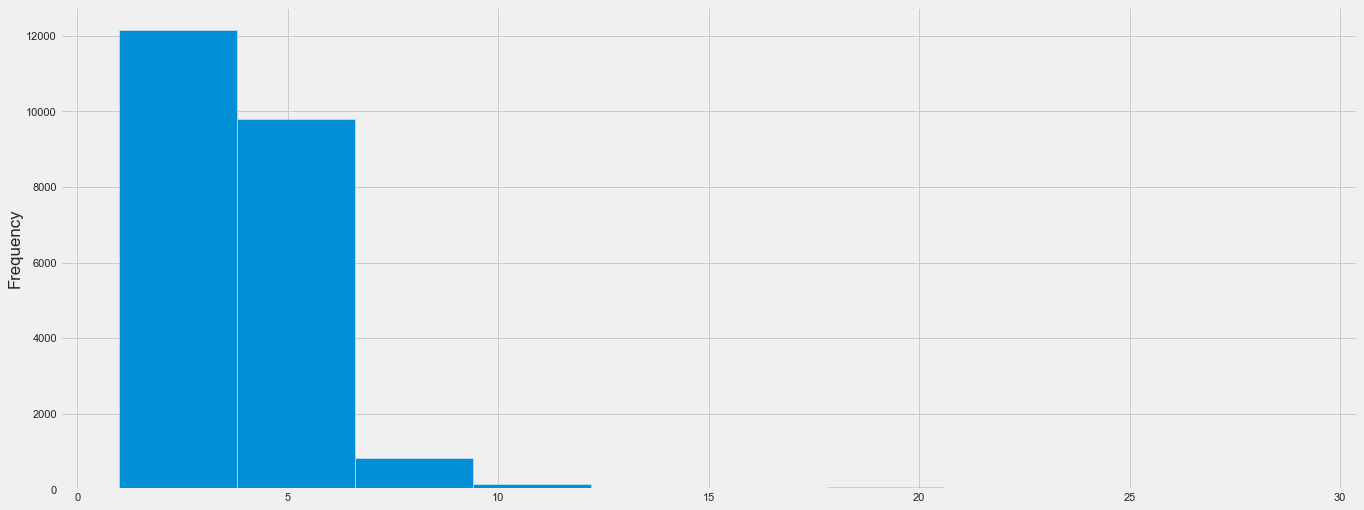

kamar


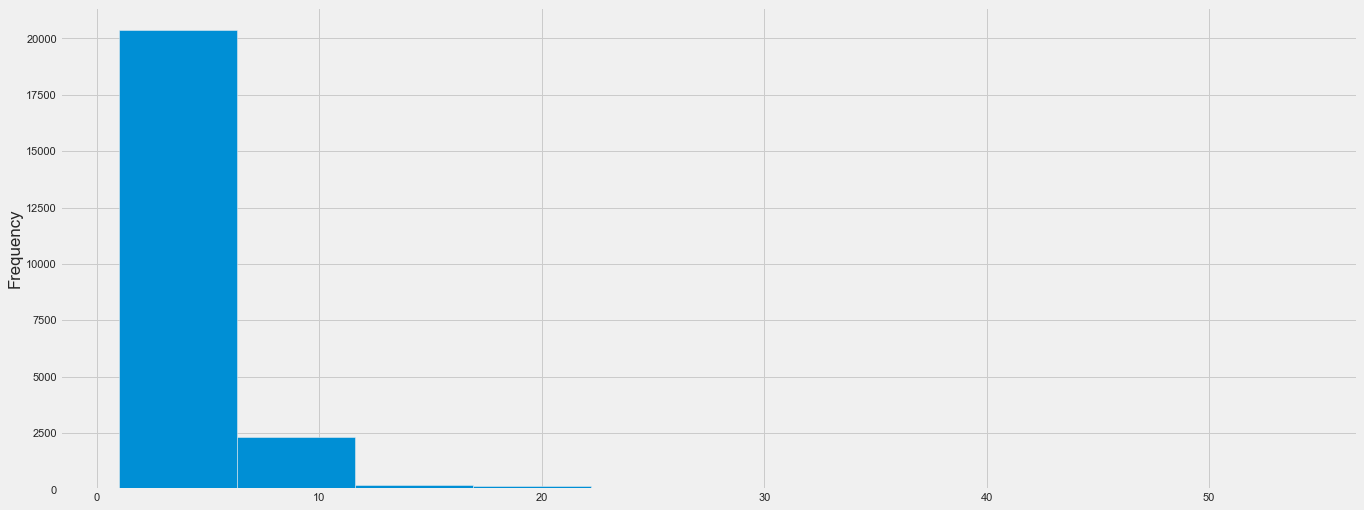

lb


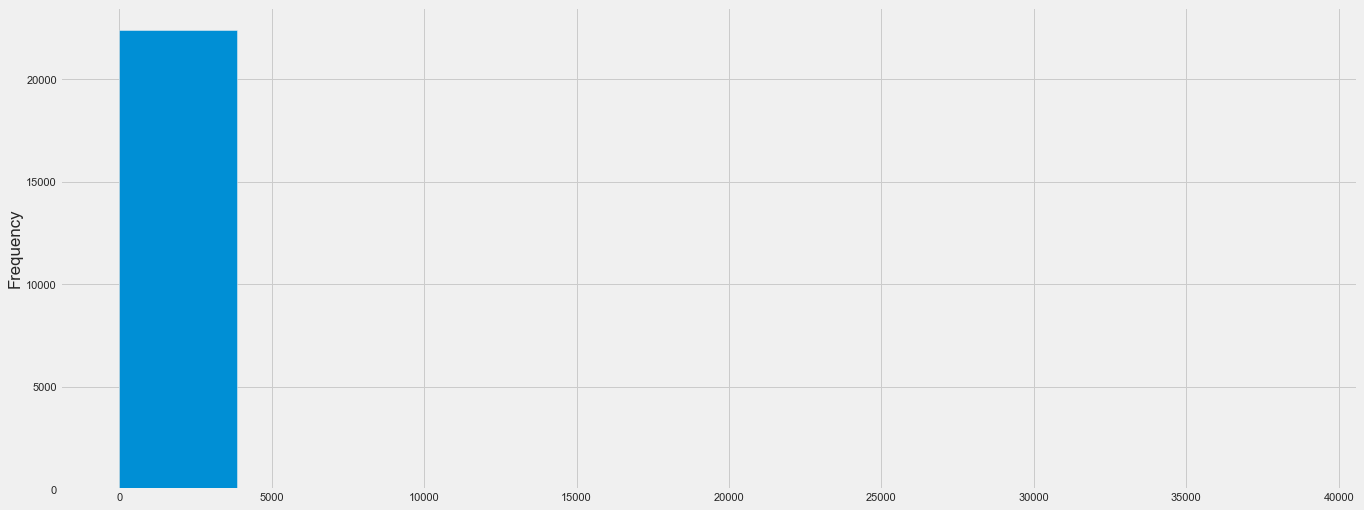

lt


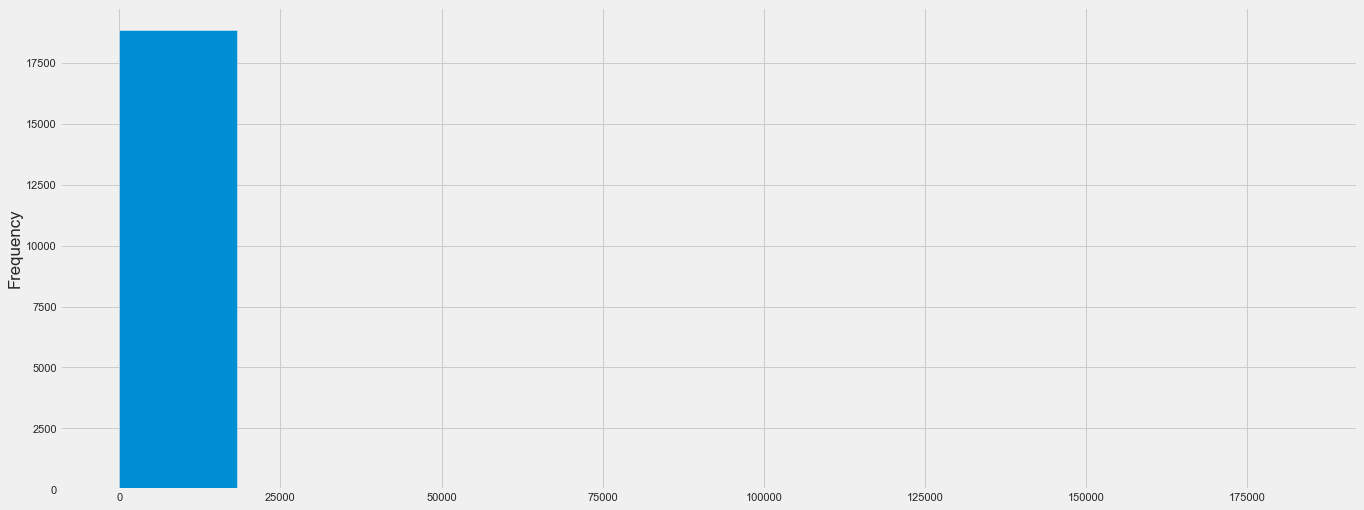

price


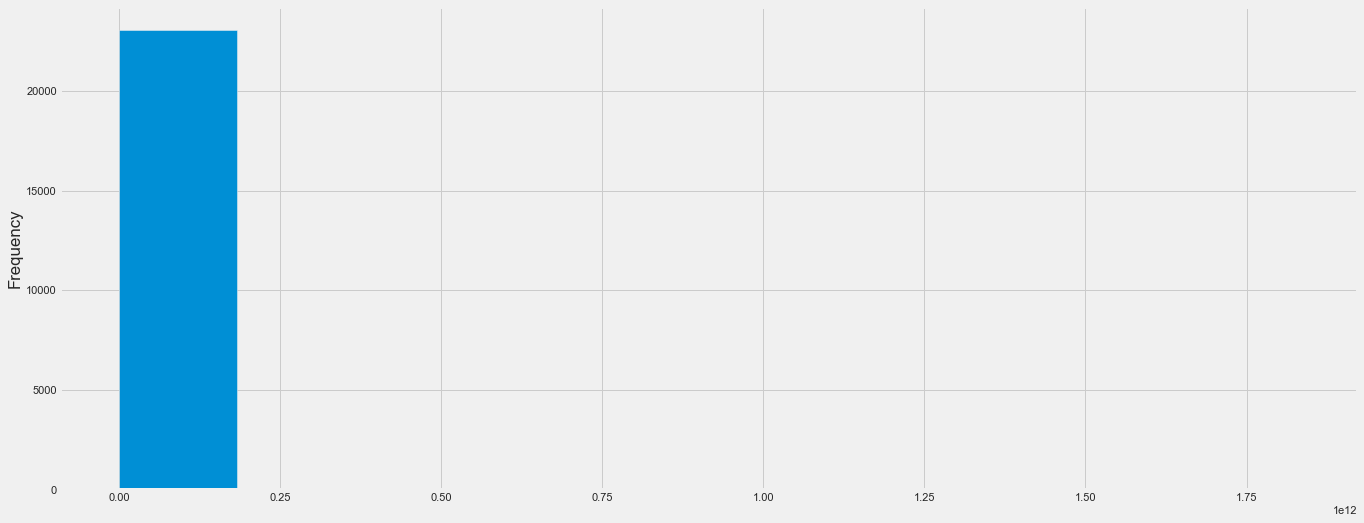

electricity


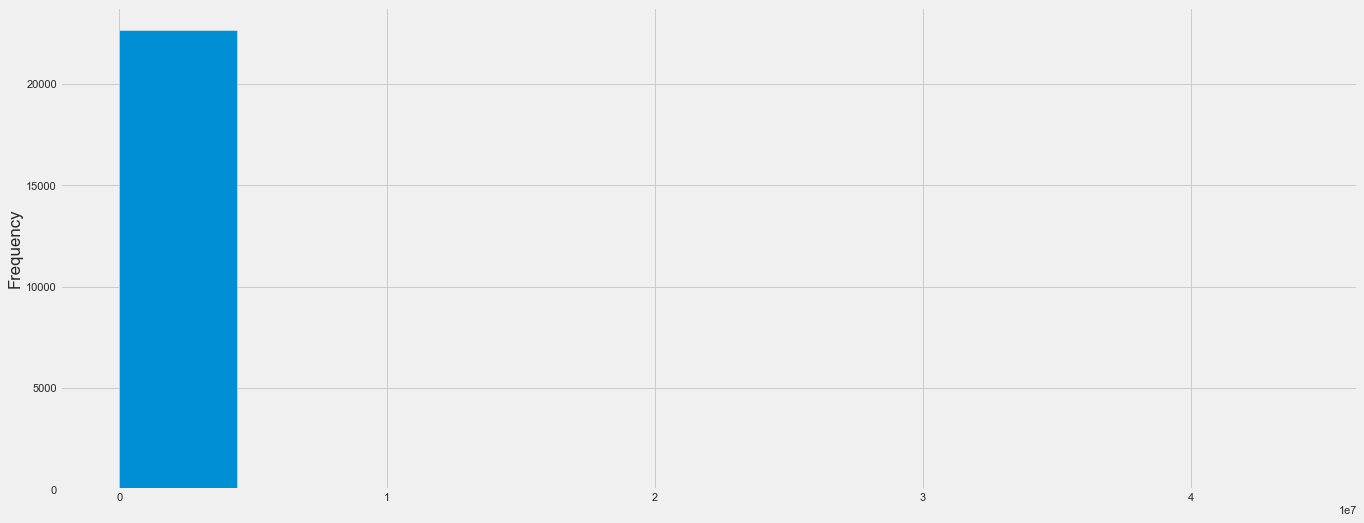

floors_total


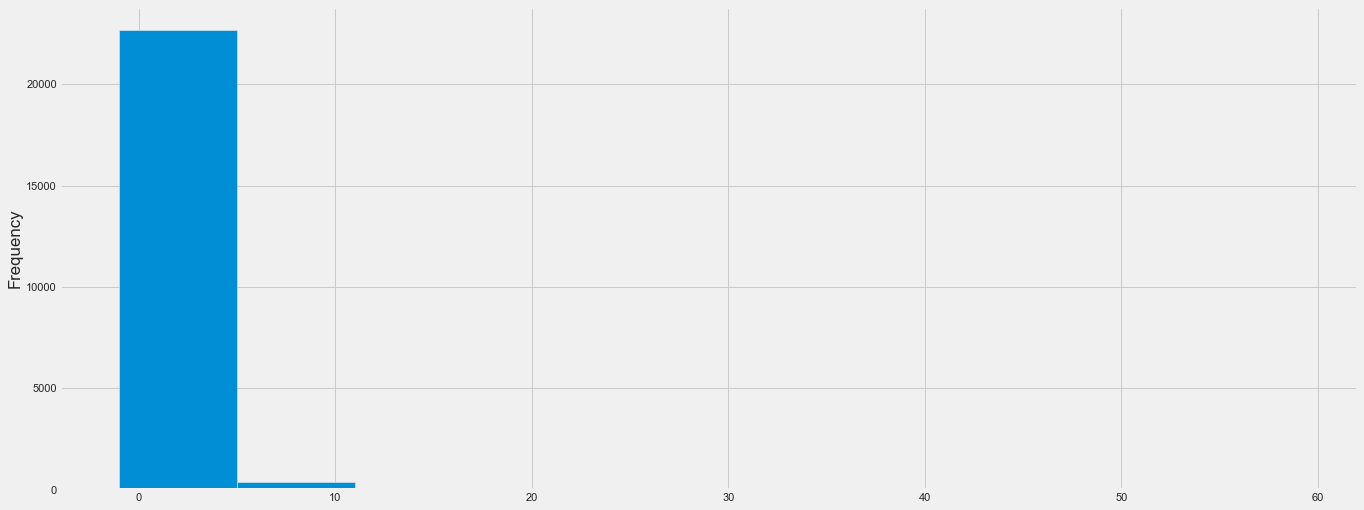

In [20]:
for i in num:
    print(i)
    df[i].plot.hist()
    plt.show()

tipe_property


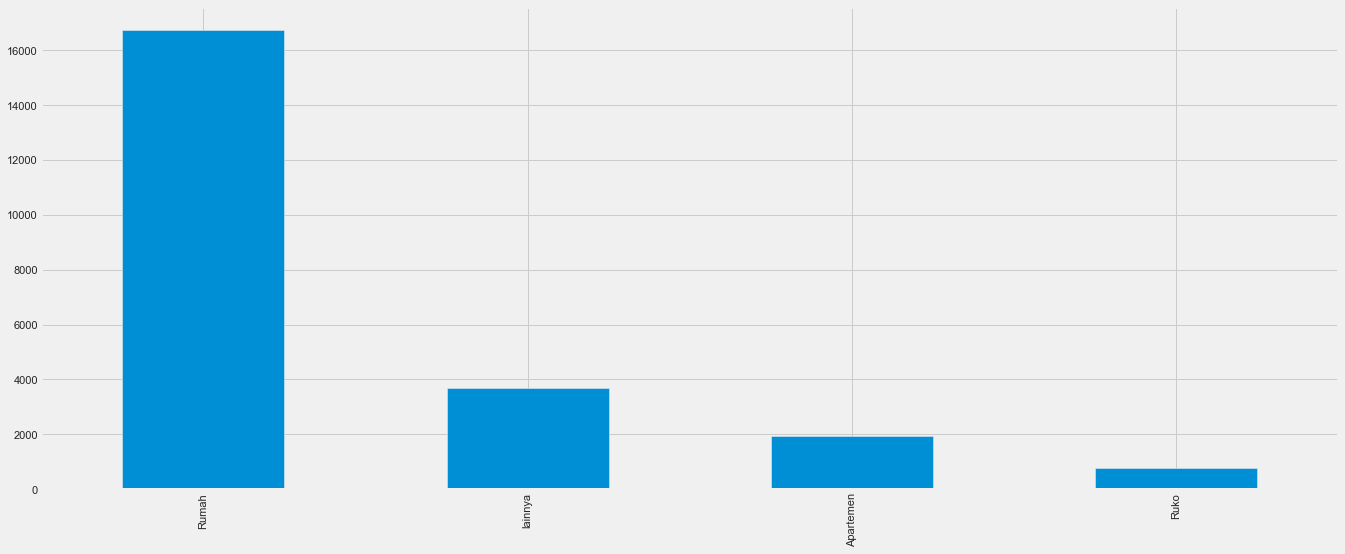

sertifikat


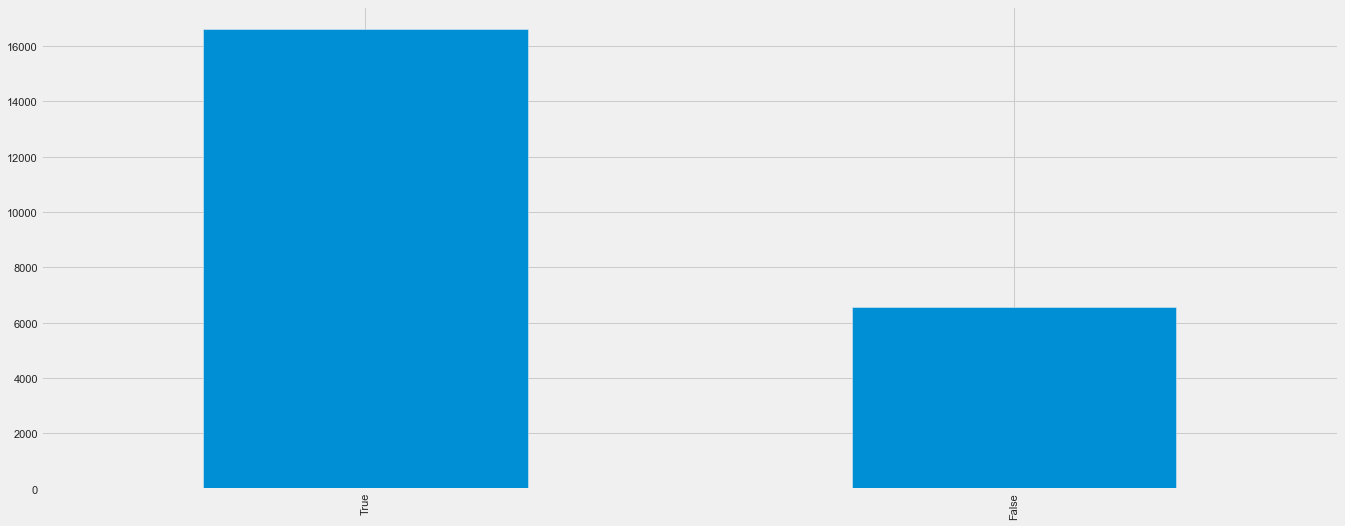

lokasi


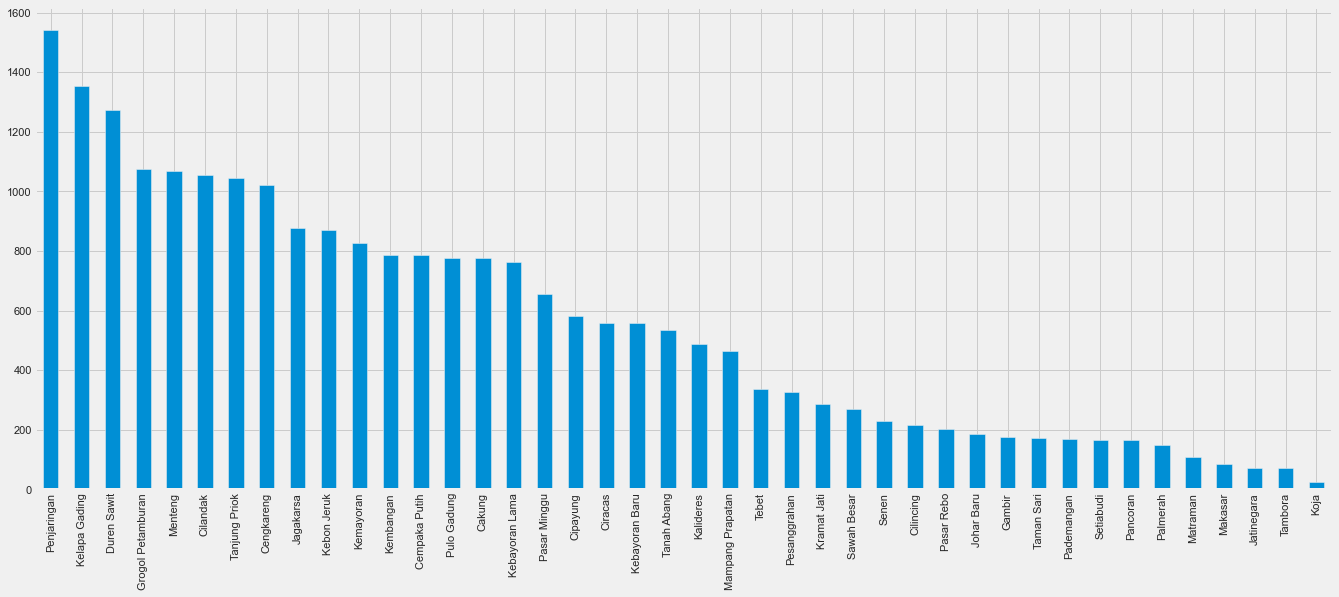

ada_garasi


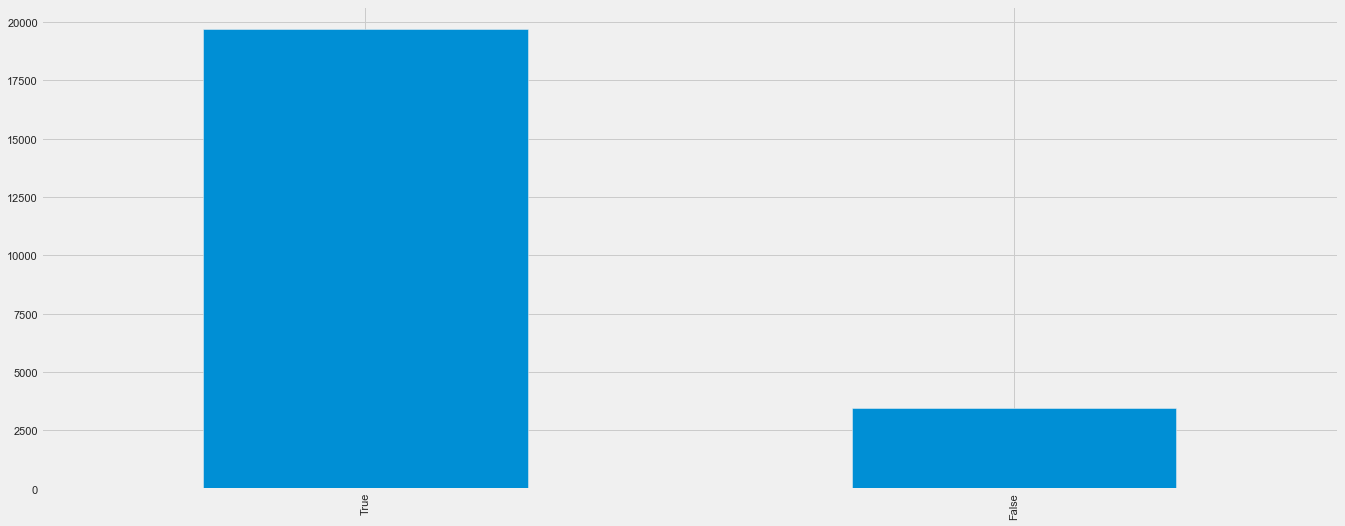

pool


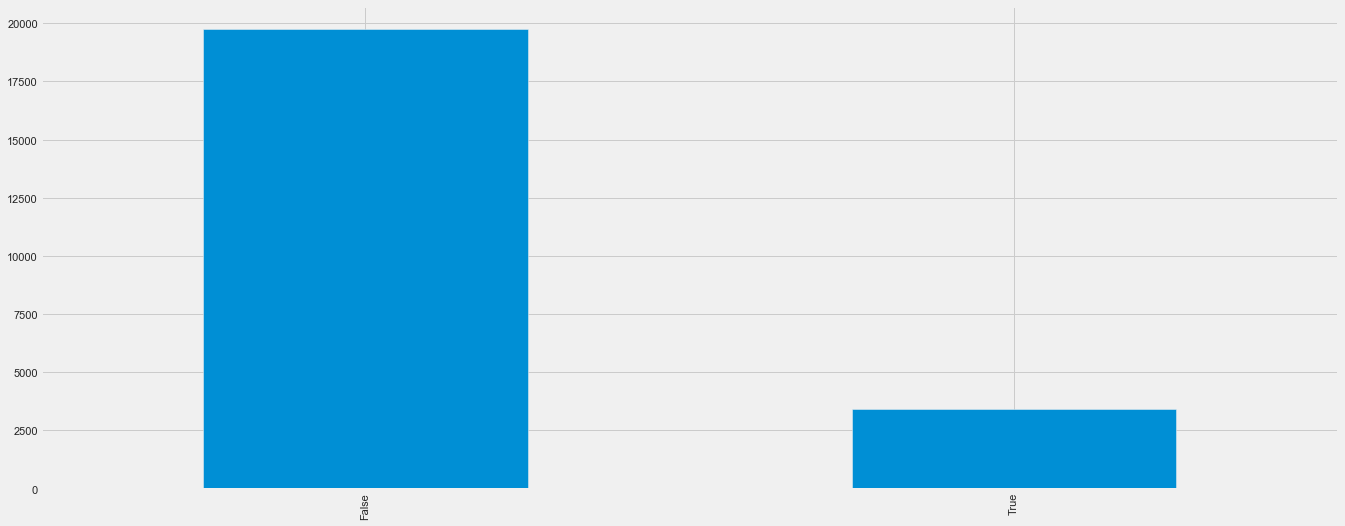

taman


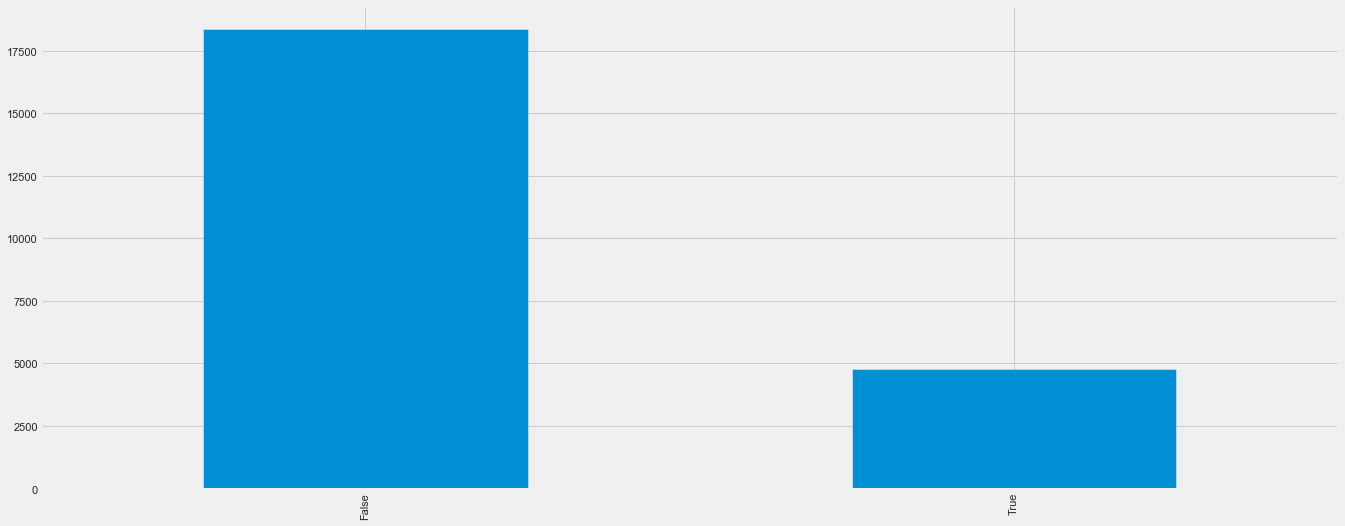

gym


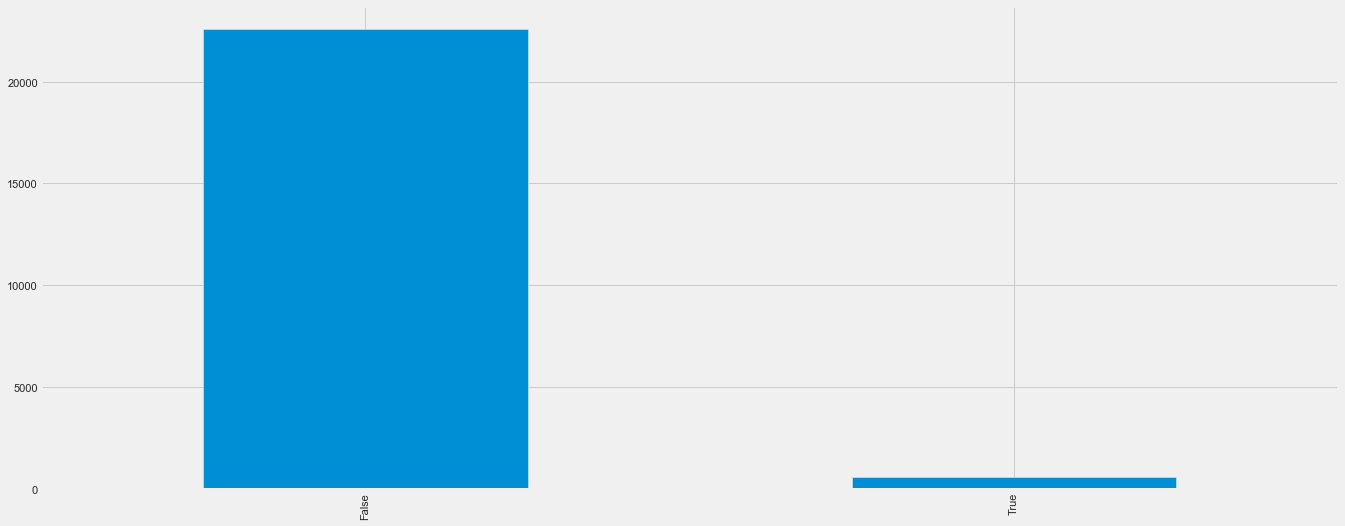

In [21]:
for i in cat:
    if df[i].nunique()<100:

        print(i)
        df[i].value_counts().plot.bar()
        plt.show()

In [22]:
df[num].describe()

,kamar_mandi,kamar,lb,lt,price,electricity,floors_total
count,23154.000000,23154.000000,22478.000000,18886.000000,2.315400e+04,2.267100e+04,23154.000000
mean,3.731105,4.671806,303.466011,371.409669,9.132349e+09,7.255177e+03,2.096312
std,2.220006,2.748071,780.156173,2659.277160,2.941404e+10,2.923871e+05,1.999408
min,1.000000,1.000000,0.000000,1.000000,3.000000e+06,-1.000000e+00,-1.000000
25%,3.000000,3.000000,100.000000,90.000000,1.580250e+09,1.300000e+03,2.000000
50%,3.000000,4.000000,180.000000,150.000000,3.000000e+09,2.200000e+03,2.000000
75%,4.000000,5.000000,320.000000,287.000000,6.950000e+09,4.400000e+03,2.000000
max,29.000000,54.000000,38668.000000,182860.000000,1.830000e+12,4.400350e+07,59.000000


Check median price distribution

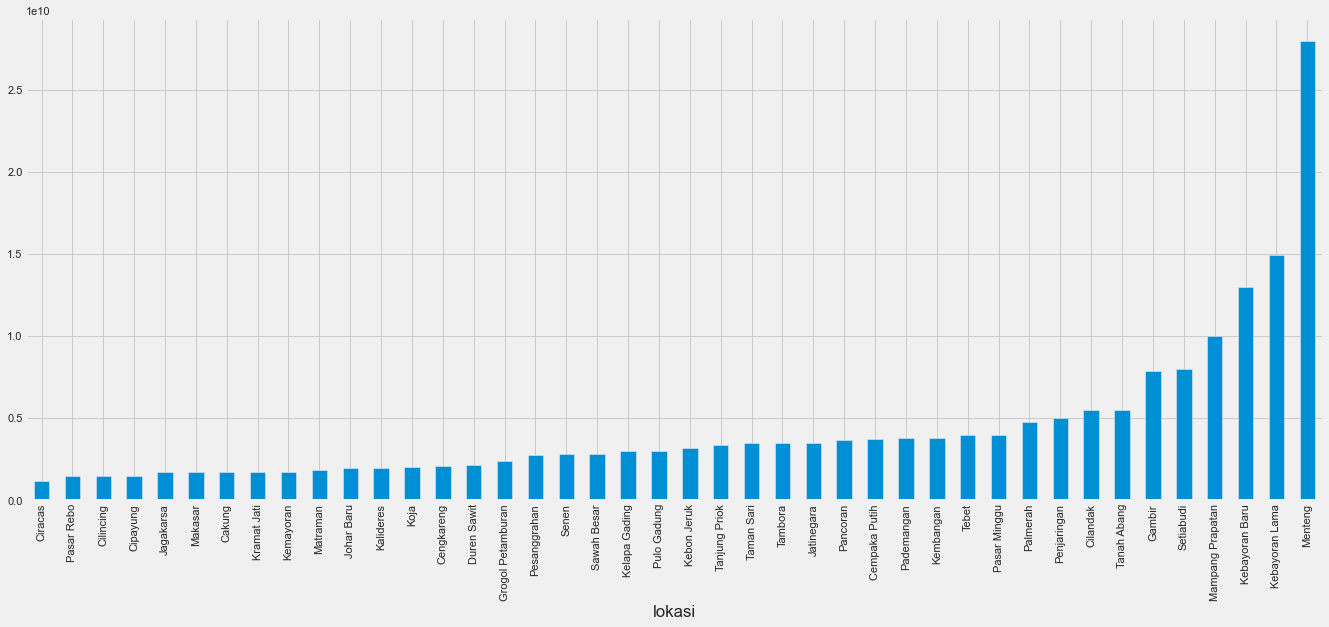

In [23]:
df.groupby('lokasi')['price'].median().sort_values().plot.bar()
plt.show()

In [24]:
df[['lokasi','price']]

,lokasi,price
0,Kebayoran Lama,1.000000e+11
1,Pasar Minggu,3.250000e+10
2,Pancoran,4.718000e+10
3,Pasar Minggu,2.115000e+10
4,Mampang Prapatan,4.900000e+09
...,...,...
23149,Jagakarsa,1.100000e+09
23150,Jagakarsa,1.350000e+09
23151,Jagakarsa,1.550000e+09
23152,Jagakarsa,1.350000e+09


### Cleaning

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23154 entries, 0 to 23153
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          23154 non-null  int64  
 1   kamar_mandi    23154 non-null  int32  
 2   kamar          23154 non-null  int32  
 3   lb             22478 non-null  float64
 4   lt             18886 non-null  float64
 5   tipe_property  23154 non-null  object 
 6   price          23154 non-null  float64
 7   sertifikat     23154 non-null  bool   
 8   deskripsi      23154 non-null  object 
 9   lokasi         23154 non-null  object 
 10  ada_garasi     23154 non-null  bool   
 11  pool           23154 non-null  bool   
 12  taman          23154 non-null  bool   
 13  electricity    22671 non-null  float64
 14  floors_total   23154 non-null  float64
 15  gym            23154 non-null  bool   
dtypes: bool(5), float64(5), int32(2), int64(1), object(3)
memory usage: 1.9+ MB


In [26]:
df[num].describe()

,kamar_mandi,kamar,lb,lt,price,electricity,floors_total
count,23154.000000,23154.000000,22478.000000,18886.000000,2.315400e+04,2.267100e+04,23154.000000
mean,3.731105,4.671806,303.466011,371.409669,9.132349e+09,7.255177e+03,2.096312
std,2.220006,2.748071,780.156173,2659.277160,2.941404e+10,2.923871e+05,1.999408
min,1.000000,1.000000,0.000000,1.000000,3.000000e+06,-1.000000e+00,-1.000000
25%,3.000000,3.000000,100.000000,90.000000,1.580250e+09,1.300000e+03,2.000000
50%,3.000000,4.000000,180.000000,150.000000,3.000000e+09,2.200000e+03,2.000000
75%,4.000000,5.000000,320.000000,287.000000,6.950000e+09,4.400000e+03,2.000000
max,29.000000,54.000000,38668.000000,182860.000000,1.830000e+12,4.400350e+07,59.000000


In [27]:
df.describe(exclude=[np.number])  

,tipe_property,sertifikat,deskripsi,lokasi,ada_garasi,pool,taman,gym
count,23154,23154,23154,23154,23154,23154,23154,23154
unique,4,2,23154,42,2,2,2,2
top,Rumah,True,lebar depan 11m\npanjang 56m\n\n- tanah bisa k...,Penjaringan,True,False,False,False
freq,16749,16607,1,1542,19692,19745,18362,22586


In [28]:
bsDesc = []

for i in df.columns:
    bsDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum() )/ len(df)) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data = bsDesc,
            columns = [
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique',
                'Unique Sample'
            ])

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,index,int64,0,0.00,23154,"[21580, 113]"
1,kamar_mandi,int32,0,0.00,29,"[14, 7]"
2,kamar,int32,0,0.00,41,"[11, 2]"
3,lb,float64,676,2.92,924,"[607.0, 1019.0]"
4,lt,float64,4268,18.43,1200,"[5356.0, 728.0]"
5,tipe_property,object,0,0.00,4,"[Ruko, lainnya]"
6,price,float64,0,0.00,1914,"[796950000.0, 850000130.0]"
7,sertifikat,bool,0,0.00,2,"[False, True]"
8,deskripsi,object,0,0.00,23154,"[Rumah 1,5 lantai dengan lokasi bagus di Sunri..."
9,lokasi,object,0,0.00,42,"[Jagakarsa, Penjaringan]"


In [29]:
# Pengecekan Outliers
for kolom in num:
    Q1 = df.describe()[kolom]['25%']
    Q3 = df.describe()[kolom]['75%']
    IQR = Q3 - Q1
    Upper_Fence = Q3 + (1.5 * IQR)
    Lower_Fence = Q1 - (1.5 * IQR)

    OutLiers = df[(df[kolom] < Lower_Fence) | (df[kolom] > Upper_Fence)]
    print(f"Jumlah Outliers kolom {kolom} = {len(OutLiers)}")
    

Jumlah Outliers kolom kamar_mandi = 4001
Jumlah Outliers kolom kamar = 987
Jumlah Outliers kolom lb = 1762
Jumlah Outliers kolom lt = 1895
Jumlah Outliers kolom price = 2761
Jumlah Outliers kolom electricity = 2925
Jumlah Outliers kolom floors_total = 10472


#### Cleaning Kolom `lb`
- Drop NaN value (NaN values kebanyakan memiliki tipe properti 'lainnya' - jual tanah)
- Batas nilai `lb` dibatasi $20<lb<10000$

In [30]:
df[df['lb'].isna()==True]['tipe_property'].value_counts()

lainnya      392
Rumah        238
Ruko          28
Apartemen     18
Name: tipe_property, dtype: int64

In [31]:
df.dropna(subset=['lb'], inplace=True)

In [32]:
df = df[(df['lb']<10000) & (df['lb']>20)]

In [33]:
# Handling Outliers Kolom lb
Q1 = df.describe()['lb']['25%']
Q3 = df.describe()['lb']['75%']
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)

Out = df[(df['lb'] < Lower_Fence) | (df['lb'] > Upper_Fence)]
print('Jumlah data outliers pada kolom lb = ', len(Out['lb']))
print('Jumlah data keseluruhan =', len(df))
# df[(df['lb'] > Upper_Fence)]

Jumlah data outliers pada kolom lb =  1743
Jumlah data keseluruhan = 22340


#### Cleaning kolom `lt` 

In [34]:
df.loc[df['tipe_property'] == "Apartemen", "lt"] = 0

In [35]:
df[df['lt'].isna()==True]['tipe_property'].value_counts()

lainnya    1215
Ruko        728
Rumah       383
Name: tipe_property, dtype: int64

In [36]:
df.dropna(subset=['lt'], inplace=True)

In [37]:
df[~(df['tipe_property']=='Apartemen')].describe()['lt']

count    18121.000000
mean       246.567463
std        384.676287
min          1.000000
25%         90.000000
50%        145.000000
75%        272.000000
max      29375.000000
Name: lt, dtype: float64

In [38]:
df[~(df['tipe_property']=='Apartemen')]['lt'].sort_values()[:120]

9062      1.0
252       1.0
17261     1.0
12335     1.0
1367      2.0
         ... 
14729    21.0
10642    21.0
9244     22.0
15501    22.0
10747    22.0
Name: lt, Length: 120, dtype: float64

In [39]:
df[~(df['tipe_property']=='Apartemen')]['lt'].sort_values(ascending=False)[:10]

17184    29375.0
21501    11000.0
1822      7000.0
14547     6575.0
17294     6201.0
22888     6000.0
13823     5356.0
2352      5250.0
21831     5000.0
15702     4854.0
Name: lt, dtype: float64

In [40]:
df.sample(2)

,index,kamar_mandi,kamar,lb,lt,tipe_property,price,sertifikat,deskripsi,lokasi,ada_garasi,pool,taman,electricity,floors_total,gym
17334,18261,3,6,550.0,465.0,Rumah,1.350000e+10,True,Cililitan Rumah Tua Selangkah dari PGC Cocok S...,Kramat Jati,True,False,False,23000.0,3.0,False
6230,6364,5,5,500.0,730.0,lainnya,1.200000e+10,True,"id 22093jl.ceger raya, cipayung jakarta timurl...",Cipayung,True,False,False,1300.0,2.0,False


In [41]:
df.drop(df[(df['lt']<22) & (df['tipe_property'] != 'Apartemen')].index, inplace=True)

In [42]:
df.drop(df[df['lt'] > 10000].index, inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19895 entries, 0 to 23153
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          19895 non-null  int64  
 1   kamar_mandi    19895 non-null  int32  
 2   kamar          19895 non-null  int32  
 3   lb             19895 non-null  float64
 4   lt             19895 non-null  float64
 5   tipe_property  19895 non-null  object 
 6   price          19895 non-null  float64
 7   sertifikat     19895 non-null  bool   
 8   deskripsi      19895 non-null  object 
 9   lokasi         19895 non-null  object 
 10  ada_garasi     19895 non-null  bool   
 11  pool           19895 non-null  bool   
 12  taman          19895 non-null  bool   
 13  electricity    19492 non-null  float64
 14  floors_total   19895 non-null  float64
 15  gym            19895 non-null  bool   
dtypes: bool(5), float64(5), int32(2), int64(1), object(3)
memory usage: 1.8+ MB


#### Cleaning kolom `tipe_property`

In [44]:
df['tipe_property'].value_counts()

Rumah        15965
lainnya       2012
Apartemen     1893
Ruko            25
Name: tipe_property, dtype: int64

In [45]:
df = df[df['tipe_property'] != 'Ruko']
df['tipe_property'].value_counts()

Rumah        15965
lainnya       2012
Apartemen     1893
Name: tipe_property, dtype: int64

In [46]:
x = df[df['tipe_property'] == 'lainnya'].head(10)
x['deskripsi'].iloc[4]

'[ for sale ]hunian nyaman & asrijagakarsa - jakarta selatan\ncluster idaman design classic ready stock 1 unit lagilt 116 m2lb 180 m2kt 4 + 1km 3 + 1carport 1 mobillistrik 2200 watt\nopen : 1.8 m - nego\ndekat pusat perbelanjaandekat pusat transportasidekat pusat pendidikandekat pasar tradisional\nlegalitas : shm - imb & pbb clear\ncash / kpr * di bantu sampai tuntas *\ninfo hub : akmalcall or wa\nkami juga menyediakan hunian :clusternon clusterindent - custom\nkami akan melayani anda dengan senang hati , karena kepuasan anda keutamaan bagi kami_vine property'

__untuk sementara pertahankan data dengan tipe properti $=$ lainnya__

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19870 entries, 0 to 23153
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          19870 non-null  int64  
 1   kamar_mandi    19870 non-null  int32  
 2   kamar          19870 non-null  int32  
 3   lb             19870 non-null  float64
 4   lt             19870 non-null  float64
 5   tipe_property  19870 non-null  object 
 6   price          19870 non-null  float64
 7   sertifikat     19870 non-null  bool   
 8   deskripsi      19870 non-null  object 
 9   lokasi         19870 non-null  object 
 10  ada_garasi     19870 non-null  bool   
 11  pool           19870 non-null  bool   
 12  taman          19870 non-null  bool   
 13  electricity    19467 non-null  float64
 14  floors_total   19870 non-null  float64
 15  gym            19870 non-null  bool   
dtypes: bool(5), float64(5), int32(2), int64(1), object(3)
memory usage: 1.8+ MB


#### Cleaning kolom `price`
- drop data dengan harga dibawah 50 jt
- pertahankan data dengan harga rumah di atas upper fence

In [48]:
df['price'].describe()

count    1.987000e+04
mean     7.335168e+09
std      1.491327e+10
min      3.000000e+06
25%      1.550000e+09
50%      2.950000e+09
75%      6.500000e+09
max      3.750000e+11
Name: price, dtype: float64

In [49]:
df.sort_values(by=['price'], ascending=True).head(30)['price']/1_000_000

17519      3.0
17186      4.5
22075     10.0
22377     12.0
22535     16.0
15468     16.0
21884     16.0
22815     24.0
18763     33.0
19095     35.5
16322     40.0
18930     40.0
18929     40.0
14224     45.0
21368     52.5
16035     55.0
19093     55.0
15103     63.0
19348     65.0
14951     85.0
13676     85.0
20821     88.0
20824     95.0
17670     95.0
14759     99.0
14820    100.0
13562    100.0
14557    100.0
17598    115.0
21098    120.0
Name: price, dtype: float64

In [50]:
## Drop rumah dengan harga pencilan?
# Handling Outliers Kolom price
Q1 = df.describe()['price']['25%']
Q3 = df.describe()['price']['75%']
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)

Out = df[(df['price'] < Lower_Fence) | (df['price'] > Upper_Fence)]
print('Jumlah data outliers pada kolom lb = ', len(Out['lb']))
print('Jumlah data keseluruhan =', len(df))
# df[(df['price'] > Upper_Fence)]
# df[(df['price'] > Lower_Fence)]

Jumlah data outliers pada kolom lb =  2387
Jumlah data keseluruhan = 19870


In [51]:
df[(df['price'] < Lower_Fence)]

,index,kamar_mandi,kamar,lb,lt,tipe_property,price,sertifikat,deskripsi,lokasi,ada_garasi,pool,taman,electricity,floors_total,gym


In [52]:
df[(df['price'] > Upper_Fence)].sort_values(by=['price'], ascending=False).head()

,index,kamar_mandi,kamar,lb,lt,tipe_property,price,sertifikat,deskripsi,lokasi,ada_garasi,pool,taman,electricity,floors_total,gym
21544,23034,7,6,4260.0,2700.0,Rumah,3.750000e+11,True,RUMAH MEWAH DI BUKIT GOLF PONDOK INDAH HARGA M...,Kebayoran Lama,True,True,True,76000.0,3.0,False
317,324,7,8,2700.0,4260.0,Rumah,3.750000e+11,True,rumah super mewah view golf luxurious european...,Kebayoran Lama,True,True,False,NaN,2.0,False
21631,23121,7,6,2700.0,4260.0,Rumah,3.750000e+11,True,RUMAH BUKIT GOLF PONDOK INDAH ~ LT/LB 4.260/2....,Kebayoran Lama,True,True,True,76000.0,2.0,False
22888,24416,5,7,700.0,6000.0,Rumah,3.500000e+11,True,rumah hitung tanah saja patra Kuningan Jakarta...,Setiabudi,True,False,False,0.0,2.0,False
21517,23007,4,4,1300.0,1580.0,Rumah,3.000000e+11,True,BUKIT GOLF RUMAH MEWAH:Bukit Golf pondok Indah...,Kebayoran Lama,True,True,False,0.0,2.0,False


In [53]:
df = df[(df['price'] > 50_000_000)]

In [54]:
df['price'].describe()

count    1.985600e+04
mean     7.340323e+09
std      1.491727e+10
min      5.250000e+07
25%      1.550000e+09
50%      2.950000e+09
75%      6.500000e+09
max      3.750000e+11
Name: price, dtype: float64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19856 entries, 0 to 23153
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          19856 non-null  int64  
 1   kamar_mandi    19856 non-null  int32  
 2   kamar          19856 non-null  int32  
 3   lb             19856 non-null  float64
 4   lt             19856 non-null  float64
 5   tipe_property  19856 non-null  object 
 6   price          19856 non-null  float64
 7   sertifikat     19856 non-null  bool   
 8   deskripsi      19856 non-null  object 
 9   lokasi         19856 non-null  object 
 10  ada_garasi     19856 non-null  bool   
 11  pool           19856 non-null  bool   
 12  taman          19856 non-null  bool   
 13  electricity    19453 non-null  float64
 14  floors_total   19856 non-null  float64
 15  gym            19856 non-null  bool   
dtypes: bool(5), float64(5), int32(2), int64(1), object(3)
memory usage: 1.8+ MB


#### Cleaning kolom sertifikat
- No missing value
- Nothing dropped

In [56]:
df['sertifikat'].value_counts()

True     15076
False     4780
Name: sertifikat, dtype: int64

In [57]:
pd.crosstab(index=df['tipe_property'], columns=df['sertifikat'], margins=True )

sertifikat,False,True,All
tipe_property,,,
Apartemen,807,1082,1889
Rumah,2964,12991,15955
lainnya,1009,1003,2012
All,4780,15076,19856


#### Cleaning kolom `lokasi`

In [58]:
df['lokasi'].nunique()

42

#### Cleaning kolom `ada_garasi`, `pool`, `taman`, `gym`
- No missing value

#### Cleaning kolom `floors_total`
- drop data with values $0$ and $-1$
- normalisasi `floors_total` untuk data dengan tipe properti apartemen $= 1$
- Nilai kolom dengan jlh lantai $\geq 5$ masih banyak yang tidak sesuai deskripsi $\rightarrow$ dibaca lagi dari deskripsi?

In [59]:
df[df['tipe_property'] == 'Apartemen']['floors_total'].value_counts()

1.0     1253
2.0      356
3.0      173
4.0       63
5.0       22
11.0       4
8.0        3
9.0        2
21.0       2
48.0       2
16.0       1
7.0        1
59.0       1
39.0       1
30.0       1
35.0       1
36.0       1
6.0        1
0.0        1
Name: floors_total, dtype: int64

In [60]:
# df[(df['tipe_property'] == 'Apartemen') & (df['floors_total']==3)].iloc[0]['deskripsi']
df.loc[df['tipe_property'] == "Apartemen", "floors_total"] = 1
df[df['tipe_property'] == 'Apartemen']['floors_total'].value_counts()

1.0    1889
Name: floors_total, dtype: int64

In [61]:
df['floors_total'].describe()

count    19856.000000
mean         1.879130
std          1.458533
min         -1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         48.000000
Name: floors_total, dtype: float64

In [62]:
df['floors_total'].value_counts()

 2.0     10948
 1.0      4514
 3.0      2699
-1.0       990
 4.0       514
 5.0       100
 8.0        17
 7.0        11
 9.0        10
 11.0        8
 0.0         8
 6.0         7
 21.0        6
 30.0        6
 39.0        2
 16.0        2
 25.0        2
 12.0        1
 48.0        1
 46.0        1
 15.0        1
 22.0        1
 19.0        1
 28.0        1
 10.0        1
 40.0        1
 38.0        1
 26.0        1
 36.0        1
Name: floors_total, dtype: int64

In [63]:
df = df[df['floors_total'] > 0]
df['floors_total'].describe()

count    18858.000000
mean         2.031074
std          1.334213
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         48.000000
Name: floors_total, dtype: float64

##### _Periksa data dengan nilai `floors_total` tinggi_

In [64]:
L  = df[df['floors_total']>5]
L['floors_total'].value_counts()

8.0     17
7.0     11
9.0     10
11.0     8
6.0      7
30.0     6
21.0     6
39.0     2
16.0     2
25.0     2
15.0     1
12.0     1
19.0     1
40.0     1
38.0     1
22.0     1
46.0     1
10.0     1
26.0     1
36.0     1
48.0     1
28.0     1
Name: floors_total, dtype: int64

In [65]:
L['tipe_property'].value_counts()

Rumah      69
lainnya    14
Name: tipe_property, dtype: int64

In [66]:
L[L['floors_total'] == 48].iloc[0]['deskripsi']

'kondisi bagus, 2 lantai, luas tanah 26m2, sertifikat shm - sertifikat hak milik, hadap selatan, 2kt, 2km, listrik 2200 watt. mohon sebutkan ga14020-br saat menghubungi kami.\nstatus : dijual\nharga dan ketersediaan properti ini bisa berubah sewaktu-waktu tanpa pemberitahuan terlebih dahulu. harap hubungi kami untuk mendapat harga dan informasi ketersediaan terkini.\nhubungi segera'

In [67]:
L[L['floors_total'] == 46].iloc[0]['deskripsi']

'jual\xa0rumah mewah baru\xa0model semi klasik\xa0kawasan elite siap huni cempaka putih jakarta pusat  harga 6.9 m nego  spesifikasi :  1. lt/lb : 225/ 370 2. kamar tidur / kamar mandi : 4+1/ 4+1 3. carport : 2 garasi 1 5. listrik\xa0: 3500 watt 7. air\xa0: jetpump 8. shm + imb 9. model semi klasik  selling point :  1. dekat rs. islam jakarta 2. dekat sekolah smp , sma negeri dan swasta 3. dekat universitas yarsi 4. dekat ke jalan utama / jalan protokol\xa0 5. posisi hoek  meeting point kfc cempaka putih  (olv)'

In [68]:
L[L['floors_total'] == 21].iloc[3]['deskripsi']

'cempaka putih tengah kompleks mewah\n(cocok untuk mess pemda karena sudah ada beberapa)\n\nlt/lb 382/282, 2 lantai, shm.\n\nkt 5+2\n\nkm 3+1\n\nlebar 15m panjang 26m\n\ngarasi 2+2 mobil\n\nac 7 units\n\nkondisi standard atap full baja ringan\n\nlebar jalan 7m (2.5 mobil), jalanan portal tidak lalu lalang mobil.\n\nrumah masih ditempati\n\n2km to lotte mall\n2km to transmart carrefour\n1km to kawasan bisnis'

In [69]:
L[L['floors_total'] == 8].iloc[2]['deskripsi']

'dijual rumah 2 lantai villa fatmawati town house, \xa0sangat strategis, dekat mall, sekolah, rs, bank, perkantoran, sangat strategis, nyaman, tenang, siap huni, cocok untuk tempat hunian yang sehat, hadap timur. mudah mencari angkutan umum. dekat dengan stasiun mrt fatmawati.  spesifikasi : 2 lantai luas tanah : 320 m2 luas bangunan : 275 m2 kamar tidur : 3 kamar mandi : 4 kmr tdr pembantu : 1 kmr mandi pembantu : 1 gudang : 1  fasilitas : *swimming pool *garasi : 2 mobil *carport : 2 mobil *ada halaman depan \xa0 *listrik 10.600 watt *jet-pump  sertifikat : hak milik  harga jual rp 7,7 m (nego)   lokasi :  fatmawati town house jl rs fatmawati no 15 pondok labu - cilandak jakarta selatan 12450   yang berminat, hubungi : "bless property" ibu dhany ,'

In [70]:
x = df[df['floors_total'] == 5]
for i in range(10):
    print(x.iloc[i]['deskripsi'])
    print(100*'=')

for sales luxury house pondok indah jakarta selatan.  264m/603m 4 + 3 bedrooms 6 + 1 bathrooms lift for 5 floors basement entertainment center wide swimming pool rooftop area imported marble flooring premium finish and sanitair designed by ateiler riri top architect indonesia price 18.5m nego
for sale brand new classic house prestigious location-pondok indah south jakarta the environment is highly desired  with a very large front road property specifications : land : 348 m2 build:1200 m2 5 storey  bedroom 5+2 bathroom 5+2 car park 10 lift  swiming pool fish pond maid pavilion banker mini golf upper dark  full marble import  sauna room water heater electricity 34.000 price idr 33,000,000,000
for sale. minimalist home /cozy living *beautiful interiors* semi furnished townhouse at lebak bulus cilandak - jakarta selatan - very close to mayapada hospital - carrefour lebak bulus - tol jorr fatmawati - mrt station lebak bulus - trans jakarta station - calm & convinient environment - free from

In [71]:
x = df[df['floors_total'] == 3]
for i in range(10):
    print(x.iloc[i]['deskripsi'])
    print(100*'=')

harga perdana !! siapa cepat dia dapat!! unit terbatas!! hunian terbaru, termurah dalam cluster, lokasi strategis di jakarta selatan, hanya selangkah ke pondok indah, pintu tol jorr dan senayan di design exclusive dengan konsep modern elegant dengan kualitas material terbaik, sirkulasi udara dan pencahayaan dalam rumah sangat bagus. unit terbatas !! bebas banjir, terletak di jakarta selatan, lokasi sangat strategis, lingkungan aman, nyaman dan tenang. akses yang sangat mudah seperti : - 10 menit ke senayan - 10 menit ke sudirman, scbd - 10 menit ke mal pondok indah - 10 menit ke tol jorr spesifikasi: - luas tanah : 111 m2 - luas bangunan : 182 m2 - bangunan : 3 lantai - kamar tidur : 3 + 1 - kamar mandi : 3 + 1 - ruang tamu, ruang keluarga, dapur, taman depan dan belakang - carport 2 mobil - one gate system - keamanan/security 24 jam harga sudah termasuk shm, imb, listrik 3300 watt, pompa air jet pump, 1 line telepon cara bayar sangat fleksibel : *bisa cash keras, cash bertahap dan kpr

In [72]:
import re
## Fungsi membaca jumlah lantai 
def JLantai(text):
    angka1='o'
    cari1 = re.search('lantai',text)
    try:
        S1 = cari1.span()
        hasil1 = text[S1[1]-12:S1[1]]
        H = re.findall(r"[^\n]+",hasil1)
        for i in H:
            if 'lantai' in i:
                hasil1 = i
                break
        x = re.search(r'\d\.\d|\d\,\d',hasil1)
        if x != None:
            angka1 = x.group()
        else:
            H = re.findall(r"[^.,]+",hasil1)
            for i in H:
                if 'lantai' in i:
                    hasil1 = i
                    break
            try:
                angka1 = (re.search(r'\d',hasil1)).group()
            except:
                S1 = cari1.span()
                hasil1 = text[S1[1]-6:S1[1]+7]
                H = re.findall(r"[^.,\n]+",hasil1)
                for i in H:
                    if 'lantai' in i:
                        hasil1 = i
                        break
                try:
                    cari = re.search("lantai",hasil1)
                    S = cari.span()
                    if ':' in hasil1[S[1]:S[1]+3]:
                        angka1 = (re.search(r'\d',hasil1)).group()
                except:
                    angka1 = 'ga ada angka?' 
    except:
        hasil1 = 'ga nemu'
    if angka1[0].isdigit() == False:    
        angka2='o'
        cari2 = re.search("tingkat",text)
        try:
            S2 = cari2.span()
            hasil2 = text[S2[1]-13:S2[1]]
            H = re.findall(r"[^\n]+",hasil2)
            for i in H:
                if 'tingkat' in i:
                    hasil2 = i
                    break
            x = re.search(r'\d\.\d|\d\,\d',hasil2)
            if x != None:
                angka2 = x.group()
            else:
                H = re.findall(r"[^.,]+",hasil2)
                for i in H:
                    if 'tingkat' in i:
                        hasil2 = i
                        break
                try:
                    angka2 = (re.search(r'\d',hasil2)).group()
                except:
                    S2 = cari2.span()
                    hasil2 = text[S2[1]-7:S2[1]+7]
                    H = re.findall(r"[^.,\n]+",hasil2)
                    for i in H:
                        if 'tingkat' in i:
                            hasil2 = i
                            break
                    try:
                        cari = re.search("tingkat",hasil2)
                        S = cari.span()
                        if ':' in hasil2[S[1]:S[1]+3]:
                            angka2 = (re.search(r'\d',hasil2)).group()
                    except:
                        angka2 = 'ga ada angka?' 
        except:
            hasil2 = 'ga nemu'
        if angka2[0].isdigit() == False:   
            angka3='o'
            cari3 = re.search("floors",text)
            try:
                S3 = cari3.span()
                hasil3 = text[S3[1]-12:S3[1]]
                H = re.findall(r"[^\n]+",hasil3)
                for i in H:
                    if 'floors' in i:
                        hasil3 = i
                        break
                x = re.search(r'\d\.\d|\d\,\d',hasil3)
                if x != None:
                    angka3 = x.group()
                else:
                    H = re.findall(r"[^.,]+",hasil3)
                    for i in H:
                        if 'floors' in i:
                            hasil3 = i
                            break
                    try:
                        angka3 = (re.search(r'\d',hasil3)).group()
                    except:
                        S3 = cari3.span()
                        hasil3 = text[S3[1]-6:S3[1]+7]
                        H = re.findall(r"[^.,\n]+",hasil3)
                        for i in H:
                            if 'floors' in i:
                                hasil3 = i
                                break
                        try:
                            cari = re.search("floors",hasil3)
                            S = cari.span()
                            if ':' in hasil3[S[1]:S[1]+3]:
                                angka3 = (re.search(r'\d',hasil3)).group()
                        except:
                            angka3 = 'ga ada angka?' 
            except:
                hasil3 = 'ga nemu'
            if angka3[0].isdigit() == False: 
                return np.nan
            else:
                return angka3
        else:
            return angka2
    else:
        return angka1

###########

## Fungsi Convert JLantai
def konv(text):
    try:
        x = text.replace(',','.')
        return float(x)
    except:
        return text
# konv(np.nan)
# konv('1,5')

### Testing Fungsi
text = df[df['floors_total'] == 3].iloc[2]['deskripsi']
print(konv(JLantai(text)))
print(text)

3.0
exclusive townhouse at cilandak    7 unit hunian modern american classic berkonsep bangunan split level /mezzanine    open 2.57 m negotiable  bangunan 3 lantai semi basement untuk 2 mobil   luas tanah 108 m2  luas bangunan 166 m2 kamar tidur 3 +1  kamar mandi 4   legalitas : shm imb pbb     selling poin  - dekat pusat perbelanjaan trans mart cilandak  - 2 menit ke toll tb simatupang  - dekat rumah sakit   - dekat selter bus way  - dekat tempat rekreasi  - 3 menit ke ampera   - akses 2 mobil  - angkutan umum 24 jam  - bebas banjir    *ket.   kav a lt/lb 140/166 harga 3.47 m  cash 2.95 m  kav b lt/lb 191/171 harga 5 m  cash 4.1 m  kav c lt/lb 110/166 harga 2.99 m cash 2.69 m  kav d lt/lb 119/171 harga 3.4 m cash 2.99 m  kav e lt/lb 111/166 harga 3.2 m cash 2.83 m  kav f lt/lb 108/166 harga 2.86 m cash 2.57 m  kav g lt/lb 136/171 harga 3.74 m cash 2.99 m


#### Membuat kolom `floors_total_new`
- Kolom ini memiliki nilai yang sama dengan `floors_total` untuk data dengan jumlah lantai $<3$
- Data dengan jumlah lantai $\geq 3$ akan dicari lewat deskripsi. 
- Bila nilai jumlah lantai tidak ditemukan di deskripsi, nilai jumlah lantai data ini akan diisi dengan nilai `nan` dulu.

In [73]:
df['floors_total'].value_counts()

2.0     10948
1.0      4514
3.0      2699
4.0       514
5.0       100
8.0        17
7.0        11
9.0        10
11.0        8
6.0         7
21.0        6
30.0        6
25.0        2
39.0        2
16.0        2
48.0        1
12.0        1
46.0        1
15.0        1
36.0        1
22.0        1
28.0        1
10.0        1
40.0        1
38.0        1
26.0        1
19.0        1
Name: floors_total, dtype: int64

In [74]:
df['floors_total_new'] = df['floors_total']

In [75]:
df.sample(1)

,index,kamar_mandi,kamar,lb,lt,tipe_property,price,sertifikat,deskripsi,lokasi,ada_garasi,pool,taman,electricity,floors_total,gym,floors_total_new
15266,15998,4,4,350.0,241.0,Rumah,5.700000e+09,True,2 Lantai di Kwitang Senen dekat ke St Gondangd...,Senen,True,False,False,5500.0,2.0,False,2.0


In [76]:
for i in range(len(df)):
    if df['floors_total_new'].iloc[i]>=3:
        text = df['deskripsi'].iloc[i]
        y = konv(JLantai(text))
        df['floors_total_new'].iloc[i] = y
df['floors_total_new'].value_counts()

C:\Users\dosal\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


2.0    11391
1.0     4646
3.0      744
4.0      128
2.5      120
3.5       75
5.0       32
0.0       28
1.5       26
8.0       16
6.0        8
7.0        8
4.5        7
9.0        5
1.2        3
3.1        3
1.3        3
1.1        2
8.3        1
4.4        1
6.5        1
2.2        1
5.5        1
3.2        1
Name: floors_total_new, dtype: int64

In [77]:
print(df[df['floors_total_new']==7]['deskripsi'].iloc[2])

dijual cepat luxury housejalan bangka raya (di dalam private compound)sangat dekat ke tendean , mampang , kuningan ,kebayoran ,senopati .luas tanah 602mluas bangunan 7462 tingkat + basement5 kamar tidur + 5 kamar mandi 1 kamar powder (kamar kecil untuk tamu)2 kamar pembantu + 1 kamar mandi pembantu 1 ruang kerja (bisa buat mushollah atau ruang doa)1 pantrygarasi muat 6 mobil + 4 motorcarport 6 mobilada kolam renang dan halam belakang taman luas dan besarlistrik 33.000 wattmarmer import , solid wood floor ,grohe-kohler sanitary .harga jual : 22.5 m (nego)informasi dan survey lokasi mohon hubungi :westri0858 80888 225 (wa)0811 8088 225


In [78]:
print(df[df['floors_total_new']==0].iloc[0]['deskripsi'])
df[df['floors_total_new']==0].loc[672]

rumah jual di jln. warung jati luas tanah 153m2 luas bangunan 150m2 2 lantai kamar tidur 5 kamar mandi 2 harga 2,4m


index                                                             689
kamar_mandi                                                         3
kamar                                                               6
lb                                                                150
lt                                                                153
tipe_property                                                   Rumah
price                                                         2.4e+09
sertifikat                                                      False
deskripsi           rumah jual di jln. warung jati luas tanah 153m...
lokasi                                                   Pasar Minggu
ada_garasi                                                       True
pool                                                            False
taman                                                           False
electricity                                                      5500
floors_total        

In [79]:
df.loc[df['floors_total_new'] == 0, 'floors_total_new'] = df['floors_total']

In [80]:
df.loc[672]

index                                                             689
kamar_mandi                                                         3
kamar                                                               6
lb                                                                150
lt                                                                153
tipe_property                                                   Rumah
price                                                         2.4e+09
sertifikat                                                      False
deskripsi           rumah jual di jln. warung jati luas tanah 153m...
lokasi                                                   Pasar Minggu
ada_garasi                                                       True
pool                                                            False
taman                                                           False
electricity                                                      5500
floors_total        

In [81]:
df[df['floors_total_new'].isna()==True]['floors_total'].value_counts()

3.0     1278
4.0      232
5.0       51
8.0       13
9.0        5
7.0        5
30.0       4
21.0       4
6.0        3
11.0       2
12.0       1
19.0       1
25.0       1
40.0       1
46.0       1
10.0       1
16.0       1
39.0       1
22.0       1
38.0       1
Name: floors_total, dtype: int64

In [82]:
df['floors_total_new'] = df['floors_total_new'].fillna(-1)

In [83]:
df.loc[df['floors_total_new'] == -1, "floors_total_new"] = df['floors_total']

In [84]:
df[df['floors_total_new'].isna()==True]['floors_total'].value_counts()

Series([], Name: floors_total, dtype: int64)

In [85]:
df = df[df['floors_total_new'] <= 5]

In [86]:
df['floors_total_new'].value_counts()

2.0    11391
1.0     4646
3.0     2048
4.0      361
2.5      120
5.0       84
3.5       75
1.5       26
4.5        7
1.3        3
3.1        3
1.2        3
1.1        2
3.2        1
2.2        1
4.4        1
Name: floors_total_new, dtype: int64

In [87]:
df['floors_total'].value_counts()

2.0     10948
1.0      4514
3.0      2670
4.0       508
5.0        98
11.0        6
9.0         5
7.0         5
6.0         3
8.0         3
30.0        2
21.0        2
39.0        1
36.0        1
15.0        1
25.0        1
48.0        1
16.0        1
28.0        1
26.0        1
Name: floors_total, dtype: int64

In [88]:
df['floors_total_new'] = df['floors_total_new'].apply(lambda x : int(x))
df['floors_total_new'] = df['floors_total_new'].astype(float)
df['floors_total_new'].value_counts()

2.0    11512
1.0     4680
3.0     2127
4.0      369
5.0       84
Name: floors_total_new, dtype: int64

In [89]:
# df.info()
df[df['floors_total'] != df['floors_total_new']].head()

,index,kamar_mandi,kamar,lb,lt,tipe_property,price,sertifikat,deskripsi,lokasi,ada_garasi,pool,taman,electricity,floors_total,gym,floors_total_new
12,13,5,5,500.0,1038.0,Rumah,1.750000e+10,True,shm 2 lantai ruang kerja ruang musik dapur ber...,Cilandak,True,True,True,NaN,8.0,False,2.0
14,15,4,3,275.0,320.0,Rumah,7.700000e+09,True,dijual rumah 2 lantai villa fatmawati town hou...,Cilandak,True,True,False,NaN,8.0,False,2.0
60,63,5,6,126.0,104.0,Rumah,2.737800e+09,True,satu lagi kami hadirkan the colony residence k...,Cilandak,True,False,False,NaN,3.0,False,2.0
62,65,5,7,185.0,100.0,Rumah,3.500000e+09,True,dijual murah rumah siap huni di tebet utara - ...,Tebet,True,False,False,NaN,3.0,False,2.0
71,74,5,5,140.0,158.0,Rumah,3.950000e+09,True,rumah modern minimalis dalam cluster area bint...,Pesanggrahan,True,False,True,NaN,4.0,False,2.0


In [90]:
df[df['floors_total'] != df['floors_total_new']].iloc[0]['deskripsi']

'shm 2 lantai ruang kerja ruang musik dapur bersih luas dapur kotor sangat luas ruang keluarga sangat besar 2 ruang tamu listrik 10.000 taman luas ada space buat bikin pool rumah hook lokasi tenang dekat ke toll desari'

In [91]:
df['floors_total_new'] = df['floors_total_new'].astype(int)

#### CLeaning kolom `listrik`
- Drop null values
- Drop data with electricity values $-1$ and $0$
- Data akan dibatasi untuk rumah dengan daya minimal 1000
- Banyak data yang nilai di kolom `electricity` tidak sesuai dengan nilai di deskripsi. Solusinya?

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18772 entries, 0 to 23153
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             18772 non-null  int64  
 1   kamar_mandi       18772 non-null  int32  
 2   kamar             18772 non-null  int32  
 3   lb                18772 non-null  float64
 4   lt                18772 non-null  float64
 5   tipe_property     18772 non-null  object 
 6   price             18772 non-null  float64
 7   sertifikat        18772 non-null  bool   
 8   deskripsi         18772 non-null  object 
 9   lokasi            18772 non-null  object 
 10  ada_garasi        18772 non-null  bool   
 11  pool              18772 non-null  bool   
 12  taman             18772 non-null  bool   
 13  electricity       18376 non-null  float64
 14  floors_total      18772 non-null  float64
 15  gym               18772 non-null  bool   
 16  floors_total_new  18772 non-null  int32 

In [93]:
df['electricity'].describe()

count    1.837600e+04
mean     7.422767e+03
std      3.247295e+05
min     -1.000000e+00
25%      1.300000e+03
50%      2.200000e+03
75%      4.400000e+03
max      4.400350e+07
Name: electricity, dtype: float64

In [94]:
df['electricity'].value_counts()

2200.0        5983
0.0           2861
1300.0        1724
3500.0        1596
4400.0        1280
              ... 
44005.0          1
22005.0          1
63.0             1
44.0             1
44003500.0       1
Name: electricity, Length: 152, dtype: int64

In [95]:
df.dropna(subset=['electricity'], inplace=True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18376 entries, 341 to 23153
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             18376 non-null  int64  
 1   kamar_mandi       18376 non-null  int32  
 2   kamar             18376 non-null  int32  
 3   lb                18376 non-null  float64
 4   lt                18376 non-null  float64
 5   tipe_property     18376 non-null  object 
 6   price             18376 non-null  float64
 7   sertifikat        18376 non-null  bool   
 8   deskripsi         18376 non-null  object 
 9   lokasi            18376 non-null  object 
 10  ada_garasi        18376 non-null  bool   
 11  pool              18376 non-null  bool   
 12  taman             18376 non-null  bool   
 13  electricity       18376 non-null  float64
 14  floors_total      18376 non-null  float64
 15  gym               18376 non-null  bool   
 16  floors_total_new  18376 non-null  int3

In [97]:
df[df['electricity']<1000]['electricity'].value_counts()

 0.0      2861
-1.0       120
 900.0      52
 130.0      33
 220.0       4
 2.0         4
 55.0        3
 11.0        3
 3.0         3
 450.0       3
 35.0        2
 1.0         2
 5.0         2
 16.0        2
 10.0        2
 12.0        1
 44.0        1
 22.0        1
 660.0       1
 42.0        1
 30.0        1
 350.0       1
 165.0       1
 770.0       1
 63.0        1
 244.0       1
 90.0        1
 33.0        1
 330.0       1
 230.0       1
 6.0         1
Name: electricity, dtype: int64

In [98]:
df = df[df['electricity']>=1000]

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15264 entries, 341 to 23153
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             15264 non-null  int64  
 1   kamar_mandi       15264 non-null  int32  
 2   kamar             15264 non-null  int32  
 3   lb                15264 non-null  float64
 4   lt                15264 non-null  float64
 5   tipe_property     15264 non-null  object 
 6   price             15264 non-null  float64
 7   sertifikat        15264 non-null  bool   
 8   deskripsi         15264 non-null  object 
 9   lokasi            15264 non-null  object 
 10  ada_garasi        15264 non-null  bool   
 11  pool              15264 non-null  bool   
 12  taman             15264 non-null  bool   
 13  electricity       15264 non-null  float64
 14  floors_total      15264 non-null  float64
 15  gym               15264 non-null  bool   
 16  floors_total_new  15264 non-null  int3

In [100]:
# Handling Outliers Kolom electricity
Q1 = df.describe()['electricity']['25%']
Q3 = df.describe()['electricity']['75%']
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)

Out = df[(df['electricity'] < Lower_Fence) | (df['electricity'] > Upper_Fence)]
print('Jumlah data outliers pada kolom lb = ', len(Out['electricity']))
print('Jumlah data keseluruhan =', len(df))

Jumlah data outliers pada kolom lb =  2028
Jumlah data keseluruhan = 15264


In [101]:
print(f'Upper Fence : {Upper_Fence}')
df[(df['electricity'] > Upper_Fence)]['electricity'].sort_values(ascending=False)[:50]

Upper Fence : 10450.0


17049    44003500.0
16697      440035.0
15461      440022.0
16315      350022.0
16243      330001.0
21578      220012.0
13374      130022.0
23006      130001.0
21971      120001.0
18963      110005.0
20102       88004.0
20251       85000.0
21631       76000.0
21544       76000.0
13914       66005.0
15421       66000.0
15240       66000.0
15550       66000.0
16061       66000.0
16279       66000.0
21469       61000.0
21455       61000.0
22432       55504.0
22448       55503.0
21986       55005.0
21904       55004.0
15412       55003.0
13656       55002.0
15440       53000.0
15989       53000.0
20247       53000.0
15813       53000.0
22076       53000.0
20257       44005.0
22884       44000.0
20926       41500.0
20060       41500.0
19882       41500.0
5004        40000.0
5006        40000.0
4992        40000.0
4875        40000.0
4991        40000.0
5008        40000.0
5009        40000.0
5010        40000.0
5012        40000.0
5015        40000.0
5007        40000.0
4982        40000.0


In [102]:
df[(df['electricity'] > Upper_Fence)]['electricity'].count()

2028

In [103]:
df[(df['electricity'] >= 40_000)]['electricity'].count()

590

In [104]:
df[(df['electricity'] == 40_000)].iloc[5]['deskripsi']

'jual cepat rumah murah 2 lantai siap huni luas 149m type 3kt di grand malaka rorotan jakarta utara  rumah bagus bangunan baru harga miring lokasi startegis bebas banjir lingkungan aman dan nyaman  bangunan 2 lantai luas tanah : 149 m2 luas bangunan : 230 m2 kamar tidur : 3 kamar mandi : 5 hadap : timur listrik : 1300 watt carport : 2 mobil sertifikat : shm  harga jual : rp 1.65m  #jualrumah #rumahmurah #kpr #jual #rumah #tanah #kavling #pabrik #ruko #gudang #perkantoran #kantor #apartemen #properti #property #jabodetabek #remax #lolita  more info : lolita re/max premier jgc boulevard hp :  wa :   websites:  https://www.lamudi.co.id/remax-premier-1/'

In [105]:
df[(df['electricity'] == 10_000)].iloc[0]['deskripsi']

'bekas pakai, gang 1 motorcocok dijadikan kontrakan /kosan2 lantai, semi furnishedluas tanah 60 (9x7.5)luas bangunan 120air pamlistrik 2200 wattsertikat shmhadap barat\nfeature :bebas banjir10 menit / 500m jalan kaki stasiun sentiong10 menit dari fk ui salemba10 menit dari lokasi perkantoran salemba / pramuka'

In [106]:
df[(df['electricity'] == 10_000)].iloc[1]['deskripsi']

'wts rumah area serdang, kemayoran, jakarta pusatlt : +- 148lb : +- 100surat-surat shmparkir mobil muat 2 di dalam dan 1 di luar gerbangjalan depan rumah +- 6 mtr (jalan 2 mobil)taman kecil di belakang3 kamar tidur2 kamar mandilistrik 2300 watt,pdam, jet pump, toren airlokasi sangat strategisdekat itc cempaka masdekat ji expo / prjbangunan full renovasi 2014dekat tol dalam kota dan tol jor\nharga 3 m\nhubungin :mei\n\xa0\nfr'

In [110]:
x = df[df['electricity']>10_000]
for i in range(100):
    print(x.iloc[i]['electricity'])
    print(x.iloc[i]['deskripsi'])
    print(100*'=')

13500.0
promo wish for home the elements apartment 2021 : 15% lebih ringan* | insentif huni 5%* | ready to move in* | foreigners are eligible to buy* | cara bayar (hard cash/kpa express, installment 12x) | semi furnished* (periode 6 maret - 30 juni 2021)
*s&k berlaku
the elements apartment tipe 3 br merupakan tipe apartemen eksklusif yang terletak di kawasan kuningan, jakarta selatan. tipe ini dilengkapi dengan 3 kamar tidur, 2 kamar mandi, 1 kamar tidur pembantu, 1 kamar mandi pembantu, ruang tamu, ruang makan, dapur dan balkon. tipe 3 br memiliki luas bangunan yang bervariasi antara nett area 119 m2 - 148 m2 didukung dengan kapasitas listrik 13.500 watt dan didalamnya terdapat dry kitchen, wardrobe, dan ac split. sementara itu, untuk kamar mandinya sendiri dilengkapi dengan fasilitas air panas dan full marmer. harga mulai dari rp. 5.200.000.000.
the elements apartment kuningan sangat cocok untuk anda yang memiliki mobilitas tinggi dalam beraktivitas dan juga ingin memiliki hunian eks

In [112]:
x = df[df['electricity']<10_000]
for i in range(20):
    print(x.iloc[i]['electricity'])
    print(x.iloc[i]['deskripsi'])
    print(100*'=')

1300.0
promo nowvember (now or never) lrt city tebet - the premiere mth november 2020 : bebas dp* | bebas biaya akad* | booking fee 5 juta*
*s&k berlaku
lrt city tebet - the premiere mth tipe premiere superior merupakan tipe apartemen yang dilengkapi dengan 1 kamar tidur, 1 kamar mandi, dapur, dan balkon. tipe premiere superior memiliki luas bangunan sga 24,12 m2 yang didukung dengan kapasitas listrik 1300 watt. harga untuk tipe ini mulai dari rp. 809.200.000.
keunggulan dari lrt city tebet - the premiere mth
lokasi strategis berada di kawasan tebet, jakarta selatan.
  terintegrasi langsung dengan sistem transportasi massal lrt, brt, dan krl.
  didukung dengan fasilitas lengkap seperti bicycle park, kolam renang.
  250 meter dari pintu masuk dalam kota.
  8 menit ke bandara halim perdana kusuma.
fasilitas yang terdapat pada lrt city tebet - the premiere mth, antara lain :
gym
  bank
  playground
  bicycle park
  f&b
  retail
  kindergarten
  plaza & garden
  coworking space
  podium
  

### _Useful codes_
df[df['lb'].isna()==True]
df.dropna(subset=['lb'], inplace=True)
df.loc[df['Tipe Properti'] == "Apartemen", "Jumlah Lantai"] = "1"
df.drop(df[(df['lt']>22) & (df['tipe_property'] != 'Apartemen')].index, inplace=True)
df['Jumlah Lantai_Desc'] = df['Jumlah Lantai_Desc'].fillna(-1)

